In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('academic_performance.csv')

print("Loaded Dataset:\n", df)


Loaded Dataset:
    Student_ID  Math_Score  English_Score  Attendance
0           1        85.0           78.0          95
1           2        90.0           82.0          90
2           3         NaN           88.0          85
3           4        70.0            NaN          80
4           5       105.0           92.0         200
5           6        95.0           85.0          75


In [2]:
print("\nMissing Values:\n", df.isnull().sum())

# Fill missing values with mean
df['Math_Score'].fillna(df['Math_Score'].mean(), inplace=True)
df['English_Score'].fillna(df['English_Score'].mean(), inplace=True)

print("\nAfter handling missing values:\n", df)



Missing Values:
 Student_ID       0
Math_Score       1
English_Score    1
Attendance       0
dtype: int64

After handling missing values:
    Student_ID  Math_Score  English_Score  Attendance
0           1        85.0           78.0          95
1           2        90.0           82.0          90
2           3        89.0           88.0          85
3           4        70.0           85.0          80
4           5       105.0           92.0         200
5           6        95.0           85.0          75


C:\Users\SHUBHAM\AppData\Local\Temp\ipykernel_10276\193599606.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Math_Score'].fillna(df['Math_Score'].mean(), inplace=True)
C:\Users\SHUBHAM\AppData\Local\Temp\ipykernel_10276\193599606.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [3]:
import numpy as np

def handle_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper_bound, upper_bound,
                       np.where(df[col] < lower_bound, lower_bound, df[col]))

numeric_cols = ['Math_Score', 'English_Score', 'Attendance']

for col in numeric_cols:
    handle_outliers(col)

print("\nAfter handling outliers:\n", df)



After handling outliers:
    Student_ID  Math_Score  English_Score  Attendance
0           1      85.000           78.0        95.0
1           2      90.000           82.0        90.0
2           3      89.000           88.0        85.0
3           4      74.375           85.0        80.0
4           5     105.000           92.0       112.5
5           6      95.000           85.0        75.0



Skewness before: 1.042454669778004


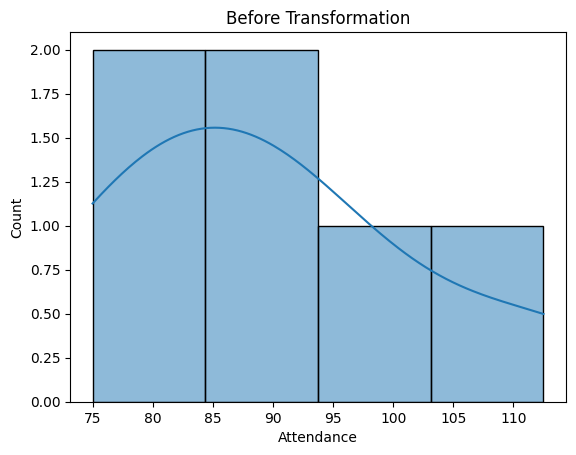

Skewness after: 0.7734383011913936


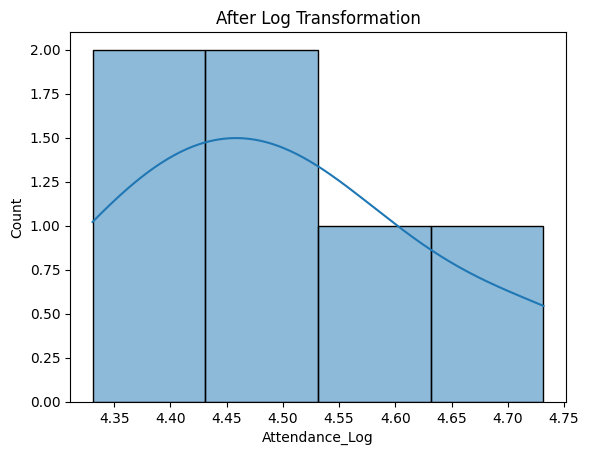

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\nSkewness before:", df['Attendance'].skew())

sns.histplot(df['Attendance'], kde=True)
plt.title('Before Transformation')
plt.show()

# Log transform
df['Attendance_Log'] = np.log1p(df['Attendance'])

print("Skewness after:", df['Attendance_Log'].skew())

sns.histplot(df['Attendance_Log'], kde=True)
plt.title('After Log Transformation')
plt.show()
